# Ticker Class

Ce notebook utilise une classe python pour manipuler un ticker : 
récupérer les données historiques
calculer les données techniques
sauvegarder ces données
visualiser graphiquement les données
prédire de nouvelles données
backtester les nouvelles données
tester les ordre sur une plate forme
exécuter les ordres sur une plateforme

## Étape 1 : Cloner le dépôt GitHub et installer les dépendances

In [1]:
# Clonez le dépôt GitHub
!git clone https://github.com/shumi289771/ticker.git
%cd StockMarketPrediction

Cloning into 'StockMarketPrediction'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 68.71 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/StockMarketPrediction


In [2]:
# Installer les dépendances
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=687e5a2ec0f04f5526c6017a15254eddba9b793b3ef94be733fc95ca69a957e3
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


## Étape 2 : Importer les classes `StockMarketValue` et `Model`

In [2]:
# Importez les classes définies dans le dépôt
from StockMarketValue import StockMarketValue
from Model import Model
from Ticker import Ticker

ModuleNotFoundError: No module named 'StockMarketValue'

## Étape 3 : Récupération et prétraitement des données de marché

In [1]:
#ticker = "AAPL"
market_data = StockMarketValue("AAPL")
ticker= Ticker("AAPL")
# Récupération des données historiques
ticker.fetch_data("1d", "2020-01-01", "2022-01-01")
print(type(ticker.data))
ticker.calculate_indicators()
ticker.display_data()

# Récupération des données historiques
market_data.fetch_data()
market_data.calculate_indicators()
market_data.normalize_data()
market_data.save_data("aapl_data.csv")

NameError: name 'StockMarketValue' is not defined

## Étape 4 : Préparation des données pour le modèle

In [41]:
# Préparation des données pour le modèle
# Assurez-vous que les données ont la forme (samples, timesteps, features)
# Exemple pour créer une séquence de longueur 5 (timesteps=5) si votre dataset le permet
import numpy as np
# Préparation des données avec une séquence de longueur 5
timesteps = 50   #c'est la fenetre de calcul
X = []
y = []

for i in range(len(market_data.data) - timesteps):
    X.append(market_data.data[['Close', 'EMA']].values[i:i+timesteps])
    y.append(market_data.data['Close'].values[i + timesteps])

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)
# Définir input_shape en fonction des dimensions de X
input_shape = (X.shape[1], X.shape[2])  # Exemple: (5, 2)
print(input_shape)

(957, 50, 2)
(957,)
(50, 2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Étape 5 : Création et entraînement du modèle avec `keras-tuner`

In [42]:
# Initialiser et entraîner le modèle
input_shape = (X.shape[1], 2)  # Définir la forme d'entrée pour Conv1D/LSTM, doit être identique à inpu_shape de la cellule precedente
print(input_shape)
model_instance = Model('CNN+LSTM', input_shape)

# Ajustement des hyperparamètres avec keras-tuner
tuner = model_instance.tune_hyperparameters(X, y)

# Entraînement du meilleur modèle
model_instance.train_best_model(X, y)
model_instance.save_model("best_model.h5")

(50, 2)
Reloading Tuner from tuner_logs/CNN+LSTM_tuning/tuner0.json
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0873 - val_loss: 0.2548
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - val_loss: 0.1401
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - val_loss: 0.1871
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.2073
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 0.2274
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.2699
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - val_loss: 0.2777
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.2786
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 0.2748
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - val_loss: 0.2876
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - val_loss: 0.2681
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.2918

Modèle entraîné
Modèle enregistré dans best_model.h5


## Étape 6 : Charger le modèle et faire des prédictions

Date
2017-01-03 00:00:00-05:00    0.000282
2017-01-04 00:00:00-05:00    0.000000
2017-01-05 00:00:00-05:00    0.001279
2017-01-06 00:00:00-05:00    0.004097
2017-01-09 00:00:00-05:00    0.006439
                               ...   
2020-12-24 00:00:00-05:00    0.956784
2020-12-28 00:00:00-05:00    1.000000
2020-12-29 00:00:00-05:00    0.983336
2020-12-30 00:00:00-05:00    0.972807
2020-12-31 00:00:00-05:00    0.963377
Name: Close, Length: 1007, dtype: float64
<class 'pandas.core.frame.DataFrame'>
(1007, 8)
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
               Close
2021-01-01  0.131925
2021-01-02  0.166480
2021-01-03  0.179443
2021-01-04  0.182998
2021-01-05  0.182841
2021-01-06  0.181818
2021-01-07  0.180723
2021-01-08  0.179773
2021-01-09  0.179211
2021-01-10  0.178919
2021-01-11  0.178775
2021-01-12  0.178918
2021-01-13  0.179093
2021-01-14  0.179033
2021-01-15  0.179040
2021-01-16  0.179004
2021-01-17  0.179684
2021-01-

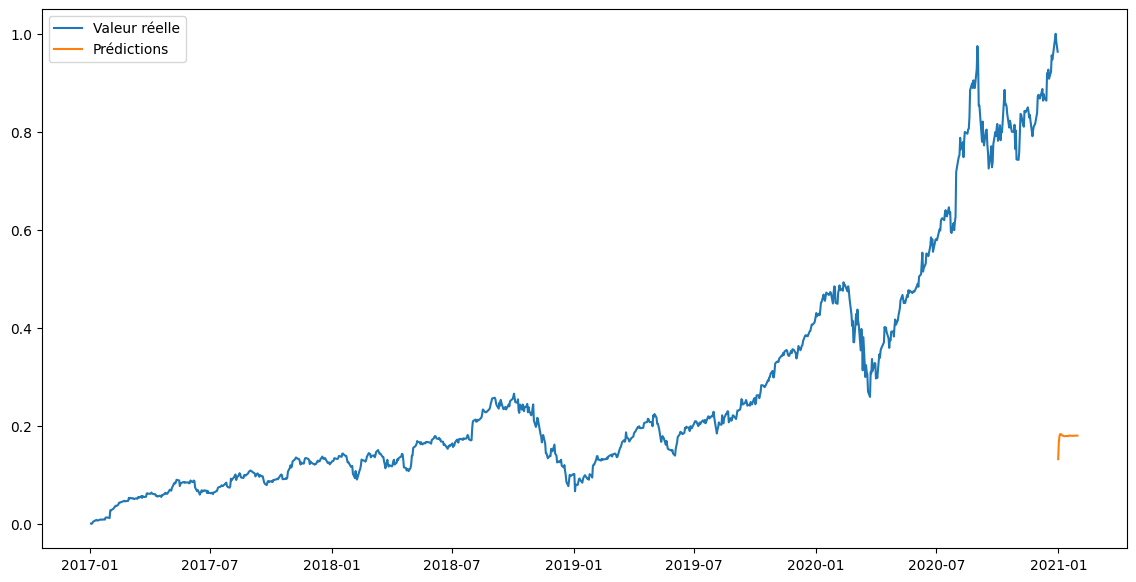

In [46]:
# @title Titre par défaut
# Charger le modèle entraîné et effectuer des prédictions
import numpy as np
import pandas as df

# Supposons que market_data.data[['Close', 'EMA']] a la forme (32, 2)
# Vous devez convertir cela en une forme (32, 5, 2) où 5 est la taille de la fenêtre temporelle

# Par exemple, on peut créer des séquences temporelles de 5 jours pour chaque échantillon
window_size = 50
X = []

# Créer des séquences de longueur window_size à partir de vos données
for i in range(len(market_data.data) - window_size + 1):
    X.append(market_data.data[['Close', 'EMA']].values[i:i+window_size])

X = np.array(X)  # La forme de X sera maintenant (nombre_d'exemples, 5, 2)
print(market_data.data['Close'])
print(type(market_data.data))
print(market_data.data.shape)

predictions = model_instance.predict(X)
predictions = predictions.reshape(-1, 1)
predictions_df = df.DataFrame(predictions, columns=['Close'])
# Créer une plage de dates comme nouvel index
predictions_df.index = df.date_range(start='2021-01-01', periods=len(predictions_df), freq='D')
predictions_df =predictions_df.iloc[:30]
print(type(predictions_df))
print(type(predictions))
print(predictions_df)
print(predictions.reshape(-1,1).shape)
print("srop")

market_data.predictions= predictions.reshape(-1,1)
print("Prédictions réalisées")
#market_data.load_model_and_predict(model_instance.model, X)
print("totot")
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(market_data.data['Close'], label='Valeur réelle')
plt.plot(predictions_df, label='Prédictions')
plt.legend()
plt.show()
#market_data.visualize_predictions()